#<font color='navy' size=6pt> Supervised Machine Learning: Regression Problems

##<font color='blue' size=5pt> Introduction

**Main Idea**:
 - the output (dependent) variable is continuous and we want to "predict" its value within the range of the input features. (<font color='red'>WARNING: doing otherwise could lead to flawed inferences</font>).
 - there is "noise" which means that for essentially the same input values there may be different slightly different values of the output variable or there is "noise" in the measurement of all the variables.  
 - we assume that the noise (i.e. the errors in measurement) are following a normal distribution with mean 0 and some unknown standard deviation.

**Main Approach**:
- we want to estimate the expected value of the dependent variable as a function of the input features. Thus we want to approximate a conditional expectation $\mathbb{E}(Y|\text{input features})$ as a function of the input features such as $$\mathbb{E}(Y|X=x) = f(x)$$

- we want to determine the simplest form of the function $f$ (principle of parsimony) and we assume that $$Y = f(X) + \sigma \epsilon$$ where $\epsilon$ is the "noise", in statistical terms, $\epsilon$ is independent and identically distributed, it follows a standard normal distribution and, $\sigma>0$ is generally unknown.


## <font color='blue' size=5pt>Ordinary Least Squares Regression (OLS)</font>

First, we assume the simplest case: data has only one input feature that is continuous.

The main idea of linear regression is the expected value of the output is a linear function of the input variable(s).

$$\mathbb{E}(Y|X=x)\approx m\cdot x + b$$

To determine the line of best fit the goal is to minimize the sum of squared residuals:

<font color='navy'>
$$
\min_{m,b} \sum\limits_{i=1}^{n}(y_i-mx_i-b)^2
$$
</font>

So the sum of the squared residuals is

$$
\sum\limits_{i=1}^{n}(y_i-mx_i-b)^2
$$

If $N$ represents the number of observations (the number of rows in the data) then the cost function may be defined
<font color='red'>
$$
L(m,b) = \frac{1}{N} \sum\limits_{i=1}^{N}(y_i-mx_i-b)^2
$$</font>

where

$$\hat{y_i} = m_\cdot x_i +b.$$

If we get our predictions $\hat{y}_i$ then we have that the Mean Squared Error is

$$
\frac{1}{N} \sum\limits_{i=1}^{N}(y_i-\hat{y}_i)^2
$$

<font color='forestgreen'> Critical Thinking: at the optimal values $(m,b)$ the partial derivatives of the cost function $L$ are equal to 0.</font>

The <font color='deepskyblue'>*gradient descent algorithm*</font> is based on this idea.


Thus, the equation of the best fit line is $$y = mx + b.$$

<font color='red'> CRITICAL THINKING: How *exactly* are we obtaining the slope and the intercept?</font>

<font color='forestgreen'>ANSWER: One way to obtain the slope and the intercept is by applying the *Ordinary Least Squares* method.</font>

We determine the values of <font color='blue'>$m$</font> and <font color='red'>$b$</font> such that the sum of the square distances between the points and the line is *minimal*.</font>

<figure>
<center>
<img src='https://drive.google.com/uc?id=16s5RAyNsFB17nut3jJMqPsPxmbLC_wP2'
width='600px' />
<figcaption>Source: Simple Linear Regression (Tobias Roeschl)</figcaption></center>
</figure>

![](https://drive.google.com/uc?export=view&id=16s5RAyNsFB17nut3jJMqPsPxmbLC_wP2)


##<font color='blue' size=5pt> Linear Correlation and Real Data Application

In the following example we learn how to write a code in Python for determining the line of best fit given one dependent variable and one input feature. That is to say we are going to determine a slope  𝑚  and an intercept  𝑛 , the equation of the best fit line being  𝑦=𝑚𝑥+𝑏.

We are going to analyze a real data set that was extracted from the 1974 Motor Trend US magazine and comprises fuel consumption and 10 aspects of automobile design and performance for 32 automobiles (1973-1974 models).

In [ ]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 120
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
cars = pd.read_csv('drive/MyDrive/Data Sets/mtcars.csv')

In [ ]:
cars

,model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2
5,Valiant,18.1,6,225.0,105,2.76,3.460,20.22,1,0,3,1
6,Duster 360,14.3,8,360.0,245,3.21,3.570,15.84,0,0,3,4
7,Merc 240D,24.4,4,146.7,62,3.69,3.190,20.00,1,0,4,2
8,Merc 230,22.8,4,140.8,95,3.92,3.150,22.90,1,0,4,2
9,Merc 280,19.2,6,167.6,123,3.92,3.440,18.30,1,0,4,4


**Objective 1**: We want to to know if there is any association between the weight of the car and the mileage.

In [ ]:
cars['mpg'].values

array([21. , 21. , 22.8, 21.4, 18.7, 18.1, 14.3, 24.4, 22.8, 19.2, 17.8,
       16.4, 17.3, 15.2, 10.4, 10.4, 14.7, 32.4, 30.4, 33.9, 21.5, 15.5,
       15.2, 13.3, 19.2, 27.3, 26. , 30.4, 15.8, 19.7, 15. , 21.4])

In [ ]:
y = cars.mpg.values
x = cars.wt.values

In [ ]:
x

array([2.62 , 2.875, 2.32 , 3.215, 3.44 , 3.46 , 3.57 , 3.19 , 3.15 ,
       3.44 , 3.44 , 4.07 , 3.73 , 3.78 , 5.25 , 5.424, 5.345, 2.2  ,
       1.615, 1.835, 2.465, 3.52 , 3.435, 3.84 , 3.845, 1.935, 2.14 ,
       1.513, 3.17 , 2.77 , 3.57 , 2.78 ])

## Relationship between x and y

In [ ]:
y = cars['mpg'].values
x = cars['wt'].values

In [ ]:
xb, yb = np.mean(x) , np.mean(y) # here we compute the center of mass

In [ ]:
xb

3.21725

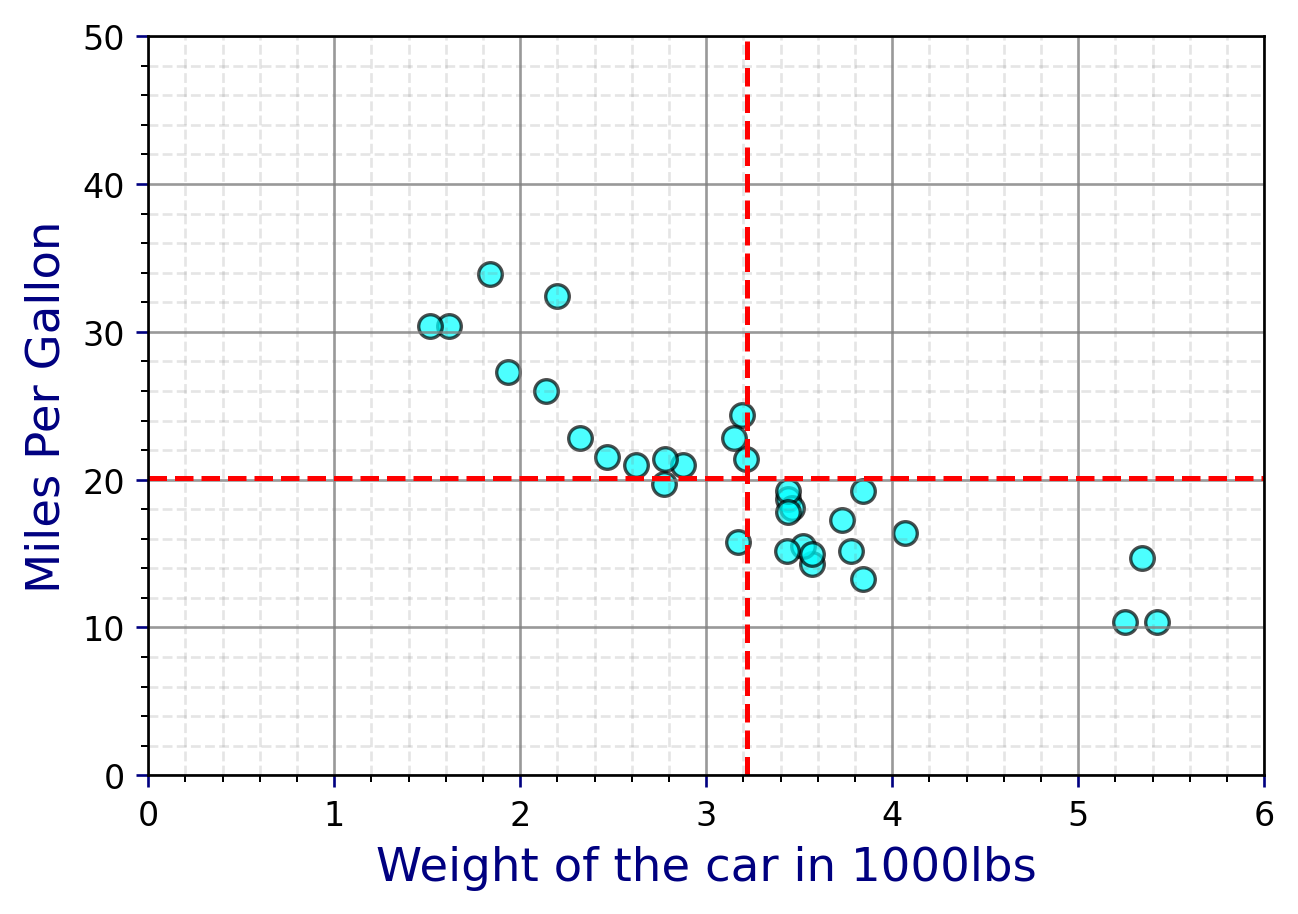

In [ ]:
fig, ax = plt.subplots(figsize=(6,4))
ax.scatter(x,y,color='cyan',s=50,ec='black',alpha=0.7)
ax.set_xlim(0, 6)
ax.set_ylim(0, 50)
ax.set_xlabel('Weight of the car in 1000lbs',fontsize=14,color='navy')
ax.set_ylabel('Miles Per Gallon',fontsize=14,color='navy')
ax.grid(which='major', color ='grey', linestyle='-', alpha=0.8)
ax.grid(which='minor', color ='grey', linestyle='--', alpha=0.2)
plt.axvline(x=xb, color='red',linestyle='dashed')
plt.axhline(y=yb, color='red',linestyle='dashed')
plt.tick_params(axis='x', color='navy')
plt.tick_params(axis='y', color='navy')
ax.minorticks_on()
plt.show()

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
# here we make x a column vector or a matrix
x = x.reshape(-1,1) #technical

In [ ]:
model = LinearRegression()
model.fit(x,y)

LinearRegression()

In [ ]:
m = model.coef_
b = model.intercept_

In [ ]:
print('The Slope is :'+str(m),' and the intercept is :' +str(b))

The Slope is :[-5.34447157]  and the intercept is :37.28512616734204


**Observation**: Based on the scatter plot and the position of the center of mass we infer that the dependent variable (MPG) is expected to drop when the input feature (Weight) increases.

The linear correlation coefficient is defined (Pearson, Karl (20 June 1895). "Notes on regression and inheritance in the case of two parents". Proceedings of the Royal Society of London. 58: 240–242.)

$$\large r: = \frac{1}{n-1}\sum_{i=1}^{n} \left(\frac{x_i - \bar{x}}{s_x}\right)\left(\frac{y_i - \bar{y}}{s_y}\right)$$

Here $\bar{x}$ is the mean of $x$, $\bar{y}$ is the mean of $y$ and, $s_x$ is the standard deviation of $x$ and $s_y$ is the standard deviation of $y.$


In [ ]:
from scipy.stats import pearsonr

In [ ]:
# we have to "ravel" back the x
x = x.ravel()

In [ ]:
r, pval = pearsonr(x,y)
print('The correlation coefficient is :'+str(r)+'  and the pvalue for significance is :'+str(pval))

The correlation coefficient is :-0.8676593765172278  and the pvalue for significance is :1.293958701350513e-10


### Test statistic for the corelation coefficient:

$$\large t=\frac{r\sqrt{n-2}}{\sqrt{1-r^2}}$$

where $n$ is the number of observations and $r$ represents the correlation coefficient computed from the data.

The slope of the regression line is

$$\large m:= r\cdot\frac{s_y}{s_x}$$

In [ ]:
m = r*np.std(y)/np.std(x)

In [ ]:
print('The slope of the trend is :' +str(m))

The slope of the trend is :-5.344471572722676


The equation of the line passing through the center of mass and that captires the trend is:
$$y-\bar{y} = m\cdot(x-\bar{x})$$

In short, $$y=m\cdot x + b$$ where $b = \bar{y} -m\cdot\bar{x}$

In [ ]:
b = yb-m*xb
print('In our case the intercept is: ' +str(b)) # what is the meaning of the intercept?

In our case the intercept is: 37.285126167342035


##<font color='blue' size=5pt> OLS Equivalence </font>

The main idea is that in 1-D the OLS estimation is equivalence with the calculation of the slope via the Pearson correlation coefficient.

In [ ]:
def loss(b, m, data): # this is also called "loss" function
    total_cost = 0

    # number of datapoints in training data
    N = float(len(data))

    # Compute sum of squared errors
    for i in range(0, len(data)):
        x = data[i, 0]
        y = data[i, 1]
        total_cost += (y - (m * x + b)) ** 2

    # Return average of squared error
    return total_cost/N

In [ ]:
# this is the actual gradient descent
def step_gradient(b_current, m_current, data, alpha):
    """takes one step down towards the minima

    Args:
        b_current (float): current value of b
        m_current (float): current value of m
        data (np.array): array containing the training data (x,y)
        alpha (float): learning rate / step size

    Returns:
        tuple: (b,m) new values of b,m
    """

    m_gradient = 0
    b_gradient = 0
    N = float(len(data))

    # Calculate Gradient - assuming you know partial derivatives
    for i in range(0, len(data)):
        x = data[i, 0]
        y = data[i, 1]
        m_gradient += - (2/N) * x * (y - (m_current * x + b_current)) # is the partial derivative with respect to m
        b_gradient += - (2/N) * (y - (m_current * x + b_current)) # is the partial derivative with respect to b

    # Update current m and b, alpha stands for learning rate
    # we proceed in the direction of the negative gradient
    m_updated = m_current - alpha * m_gradient
    b_updated = b_current - alpha * b_gradient

    #Return updated parameters
    return b_updated, m_updated

def gradient_descent(data, starting_b, starting_m, learning_rate, num_iterations):
    """runs gradient descent

    Args:
        data (np.array): training data, containing x,y
        starting_b (float): initial value of b (random)
        starting_m (float): initial value of m (random)
        learning_rate (float): hyperparameter to adjust the step size during descent
        num_iterations (int): hyperparameter, decides the number of iterations for which gradient descent would run

    Returns:
        list : the first and second item are b, m respectively at which the best fit curve is obtained, the third and fourth items are two lists, which store the value of b,m as gradient descent proceeded.
    """

    # initial values
    b = starting_b
    m = starting_m

    # to store the cost after each iteration
    cost_graph = []

    # to store the value of b -> bias unit, m-> slope of line after each iteration (pred = m*x + b)
    b_progress = []
    m_progress = []

    # For every iteration, optimize b, m and compute its cost
    for i in range(num_iterations):
        cost_graph.append(loss(b, m, data))
        b, m = step_gradient(b, m, data, learning_rate)
        b_progress.append(b)
        m_progress.append(m)

    return [b, m, cost_graph,b_progress,m_progress]

In [ ]:
#hyperparamters
learning_rate = 0.001
initial_b = 12
initial_m = 3
num_iterations = 50000
data = np.column_stack([x,y])

In [ ]:
b, m, cost_graph,b_progress,m_progress = gradient_descent(data, initial_b, initial_m, learning_rate, num_iterations)

#Print optimized parameters
print ('Optimized b:', b)
print ('Optimized m:', m)

#Print error with optimized parameters
print ('Minimized cost:', loss(b, m, data))

Optimized b: 37.27234604666433
Optimized m: -5.340801130745784
Minimized cost: 8.697573986717137


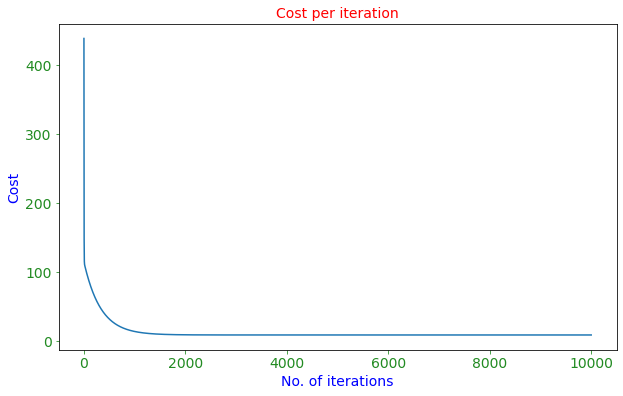

In [ ]:
fig, ax = plt.subplots(figsize=(10,6))
plt.plot(cost_graph)
ax.set_xlabel('No. of iterations',fontsize=14,color='blue')
ax.set_ylabel('Cost',fontsize=14,color='blue')
plt.title('Cost per iteration',color='red',fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
ax.tick_params(axis='x', colors='forestgreen')
ax.tick_params(axis='y', colors='forestgreen')
plt.show()

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
# what is the shape of x?
x.shape

(32,)

In [ ]:
model = LinearRegression()
model.fit(x.reshape(-1,1),y)

LinearRegression()

In [ ]:
model.coef_ , model.intercept_ # this is what the has learned

(array([-5.34447157]), 37.28512616734204)

In [ ]:
x_range = np.linspace(np.min(x)-1,np.max(x)+1,2)
yhat = model.predict(x_range.reshape(-1,1))

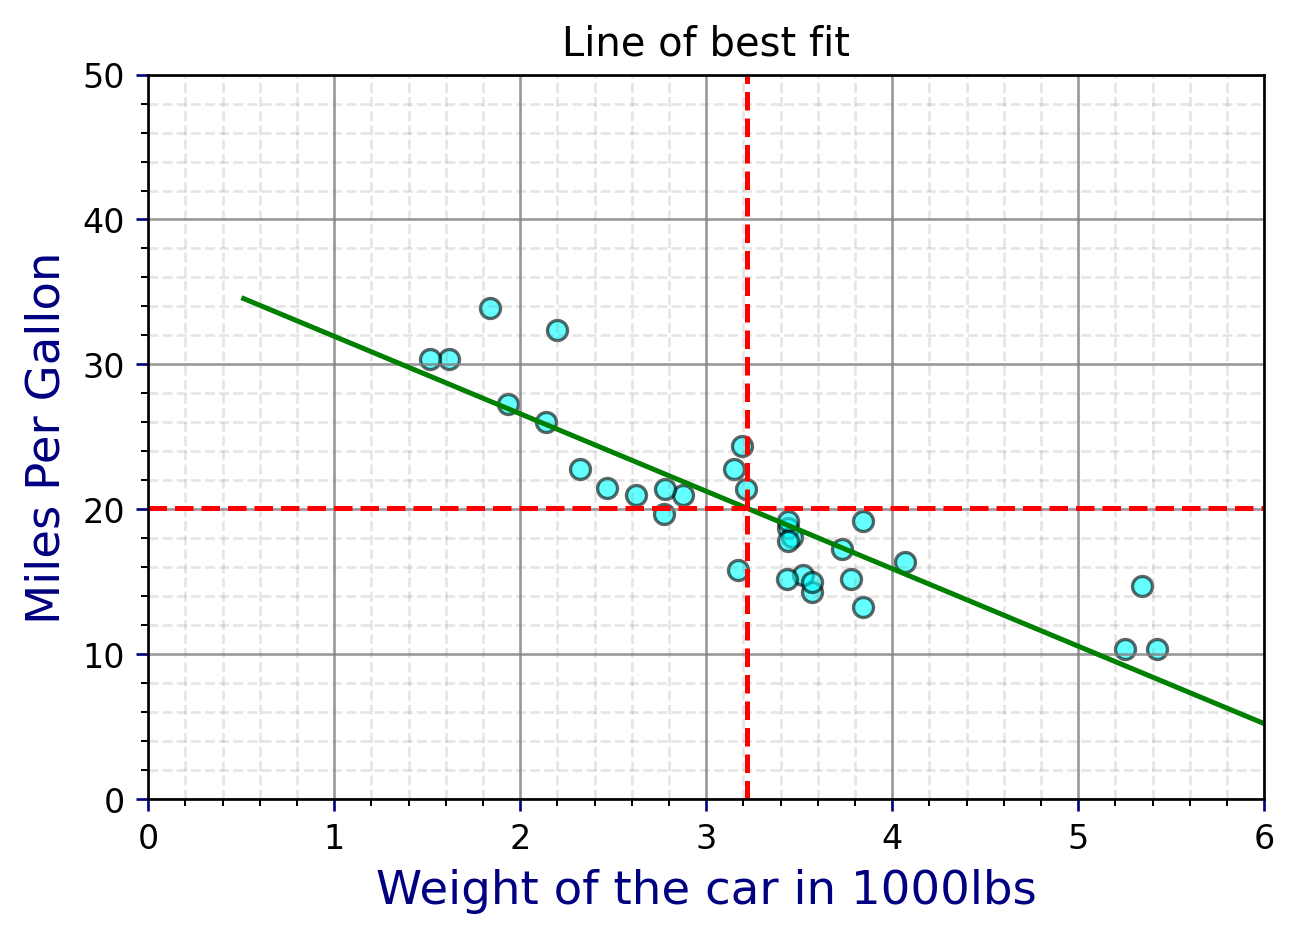

In [ ]:
#Plot dataset
plt.scatter(x, y,ec='k',color='cyan',alpha=0.6)
#Predict y values
pred = m * x_range + b
#Plot predictions as line of best fit
plt.plot(x_range, pred, c='g')
plt.xlim(0, 6)
plt.ylim(0, 50)
plt.xlabel('Weight of the car in 1000lbs',fontsize=14,color='navy')
plt.ylabel('Miles Per Gallon',fontsize=14,color='navy')
plt.grid(which='major', color ='grey', linestyle='-', alpha=0.8)
plt.grid(which='minor', color ='grey', linestyle='--', alpha=0.2)
plt.axvline(x=xb, color='red',linestyle='dashed')
plt.axhline(y=yb, color='red',linestyle='dashed')
plt.tick_params(axis='x', color='navy')
plt.tick_params(axis='y', color='navy')
plt.minorticks_on()
plt.title('Line of best fit')
plt.show()

### The Coefficient of Determination

$$\large R^2:=1-\frac{\sum (residual_i)^2}{\sum(y_i-\bar{y})^2}$$

In [ ]:
model.score(x.reshape(-1,1),y)

0.7528327936582646

In [ ]:
r**2

0.7528327936582647

##<font color='blue' size=5pt>Test the Residuals for Goodness of fit</font>

We investigate the distribution of the residuals, plot a histogram and apply a normality test

In [ ]:
residuals = y - model.predict(x.reshape(-1,1))

In [ ]:
import seaborn as sns

# import uniform distribution
from scipy import stats
from scipy.stats import norm

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


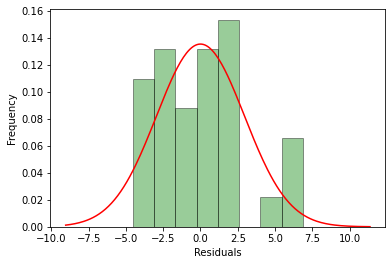

In [ ]:
ax1 = sns.distplot(residuals,

                  bins=8,
                  kde=False,
                  color='deepskyblue',
                  hist_kws={"color":'green','ec':'black'},
                  fit=stats.norm,
                  fit_kws={"color":'red'})
ax1.set(xlabel='Residuals', ylabel='Frequency')
plt.show()

### Message: The histogram does not quite look like a normal distribution. We can also consider a Q-Q Plot:

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  """


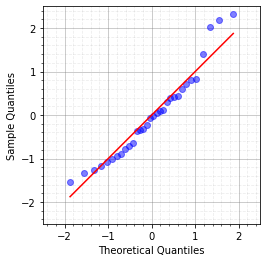

In [ ]:
import statsmodels.api as sm
sm.qqplot(residuals/np.std(residuals), loc = 0, scale = 1, line='s',alpha=0.5)
plt.xlim([-2.5,2.5])
plt.ylim([-2.5,2.5])
plt.axes().set_aspect('equal')
plt.grid(b=True,which='major', color ='grey', linestyle='-', alpha=0.5)
plt.grid(b=True,which='minor', color ='grey', linestyle='--', alpha=0.15)
plt.minorticks_on()
plt.show()

### Test Statistic for the Kolmogorov-Smirnov test is:

$$\sup |EDF(x) - CDF(x)|$$

Here $$EDF(x)$$ means the emprirical distribution function:

$$EDF(x):= \frac{1}{n}\sum \mathbb{1}(t)_{t<x}$$

we add $1$ for each $t$ less than $x$.

ALso, $CDF$ stands for the cummulative distribution function:

$$CDF(x):= \int_{-\infty}^{x}f(t)dt$$ where $f$ is the probability density function.

If the p-value is high (much greater then 5%) we do not reject the null hypethesis which means that the normality assumption is not violated.

In [ ]:
dist = getattr(stats, 'norm')
params = dist.fit(residuals)

In [ ]:
params

(-8.215650382226158e-15, 2.949162685955028)

In [ ]:
# here we apply the test
stats.kstest(residuals, "norm", params)

KstestResult(statistic=0.08217402470387336, pvalue=0.9821261392158506)

### The conclusion, in our case, is that the normality assumption is not violated.

In [ ]:
# for your convenience, this is the table with the critical values for the
# Kolmogorov-Smirnov test
from __future__ import print_function

from scipy.stats import ksone

def ks_critical_value(n_trials, alpha):
    return ksone.ppf(1-alpha/2, n_trials)

trials = range(1, 40)
alphas = [0.1, 0.05, 0.02, 0.01]

# Print table headers
print('{:<6}|{:<6} Level of significance, alpha'.format(' ', ' '))
print('{:<6}|{:>8} {:>8} {:>8} {:>8}'.format(*['Trials'] + alphas))
print('-' * 42)
# Print critical values for each n_trials x alpha combination
for t in trials:
    print('{:6d}|{:>8.5f} {:>8.5f} {:>8.5f} {:>8.5f}'
          .format(*[t] + [ks_critical_value(t, a) for a in alphas]))
    if t % 10 == 0:
        print()

In [ ]:
ks_critical_value(31,0.4)

0.15594527177147208

### A different normality test indicates the same thing

In [ ]:
stats.anderson(residuals,dist='norm')

AndersonResult(statistic=0.46842144463906266, critical_values=array([0.523, 0.596, 0.715, 0.834, 0.992]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))

In [ ]:
stats.shapiro(residuals)

(0.9450768828392029, 0.10438867658376694)

In [ ]:
#@title
model = sm.OLS(y, x)
results = model.fit()
print(results.summary())

## <font color='blue'>Multiple Linear Regression (Linear models with more features)</font>

**Important** The matrix vector product is a linear combination of the columns of the matrix:

$$\large X\beta =\beta_1\begin{bmatrix}
           x_{11} \\
           x_{21} \\
           \vdots \\
           x_{n1}
         \end{bmatrix}
         +
         \beta_2\begin{bmatrix}
           x_{11} \\
           x_{21} \\
           \vdots \\
           x_{n1}
         \end{bmatrix}
                  + ...
         \beta_p\begin{bmatrix}
           x_{1p} \\
           x_{2p} \\
           \vdots \\
           x_{np}
         \end{bmatrix}
$$
where

$$\large X = \begin{bmatrix}
x_{11}, x_{12}, ... x_{1p} \\
x_{21},x_{22}, ...x_{2p} \\
\vdots \\
x_{n1}, x_{n2}, ... x_{np}
\end{bmatrix}
$$

An example of a linear model with two features is $\hat{y}_i = 1+3x_{i1}+5x_{i2}.$

In this example the value $1$ is referred to as the *intercept*.


If $p$ features in the data and we want to create a linear model, the *input-output* mechanism is

$$
\underbrace{Y}_\text{Output}  = \underbrace{\beta_1 X_1+\beta_2 X_2+...+\beta_p X_p}_\text{Linear combination of features}
$$

This could represented as a matrix-vector product:

$$
\underbrace{Y}_\text{Output}  = \underbrace{X\cdot \beta}_\text{Linear combination of the columns of matrix X}
$$

In this model the features are $X_1, X_2, ...X_p$ and $\beta_1, \beta_2,...\beta_p$ are a set of weights (real numbers).


## <font color='blue'>Linear vs Non-linear models</font>

This is a linear model in terms of the weights $\beta$:


$$\large
\hat{y} = \beta_0 + \beta_1x_1 + \beta_2x_2 - \beta_3x_3
$$

An example for what linear in weights means
<font color='forestgreen'>
$$
\hat{y}(2\beta+3\alpha) = 2\hat{y}(\beta)+3\hat{y}(\alpha)
$$</font>

The following is a non-linear model in terms of the coefficients (weights):


$$\large
\hat{y} = \beta_0 + \beta_1^3x_1 + \frac{1}{\beta_2+\beta_3}x_2 - e^{\beta_3}x_3
$$

<font color='magenta'>
$$
\hat{y}(2\beta+3\alpha) \neq 2\hat{y}(\beta)+3\hat{y}(\alpha)
$$</font>

The main point of linear regression is to assume that predictions can ben made by using a linear combination of the features.

For example, if the data from each feature is $$\begin{bmatrix}
           x_{11} \\
           x_{21} \\
           \vdots \\
           x_{n1}
         \end{bmatrix},
         \begin{bmatrix}
           x_{12} \\
           x_{22} \\
           \vdots \\
           x_{n2}
         \end{bmatrix}, ...
         \begin{bmatrix}
           x_{1p} \\
           x_{2p} \\
           \vdots \\
           x_{np}
         \end{bmatrix}$$  then we assume that the depdendent variable is predicted by a linear combination of these columns populated with features' data. Each column represents a feature and each row an independent observation.

The predicted value is denoted by $\hat{y}$ and


$$
\hat{y} = \beta_1\begin{bmatrix}
           x_{11} \\
           x_{21} \\
           \vdots \\
           x_{n1}
         \end{bmatrix}
         +
         \beta_2\begin{bmatrix}
           x_{11} \\
           x_{21} \\
           \vdots \\
           x_{n1}
         \end{bmatrix}
                  + ...
         \beta_p\begin{bmatrix}
           x_{1p} \\
           x_{2p} \\
           \vdots \\
           x_{np}
         \end{bmatrix}
$$

### We have a vector of weights:

$$
\beta = \begin{bmatrix}
           \beta_{1} \\
           \beta_{2} \\
           \vdots \\
           \beta_{p}
         \end{bmatrix}
$$

### <font color="forestgreen">
Critical thinking: what exactly is $\hat{y}$?
</font>

<font color='magenta'> The matrix-vector product between the feaures and the weights
$$
\hat{y} = X\cdot\beta
$$
</font>

The main idea is that

$$
\hat{y}= \begin{bmatrix}
           \hat{y}_{1} \\
            \hat{y}_{2}  \\
           \vdots \\
             \hat{y}_{n}
         \end{bmatrix}
$$

represents the predictions we make by training (or as we say in ML *learning*) the weights $\beta.$

Training means running an optimization algorithm and determining the values of the weights that minimize an objective function.

### <font color='darkgreen'> We want to *learn* the weights $\beta_1,\beta_2,...\beta_p$ that minimize the sum of the squared residuals:

$$\large
\sum\limits_{i=1}^{n}\left(y_i-\sum\limits_{j=1}^{p}X_{i,j}\cdot\beta_j\right)^2
 = \sum\limits_{i=1}^{n}\left(y_i-X_{i,1}\beta_1-X_{i,2}\beta_2 - ...X_{i,p}\beta_p\right)^2 $$
</font>

### <font color='red'> How do we know we are on the right track after we perform the minimization of the square residuals? <font>

In [ ]:
x = cars.iloc[:,2:8]
x

,cyl,disp,hp,drat,wt,qsec
0,6,160.0,110,3.90,2.620,16.46
1,6,160.0,110,3.90,2.875,17.02
2,4,108.0,93,3.85,2.320,18.61
3,6,258.0,110,3.08,3.215,19.44
4,8,360.0,175,3.15,3.440,17.02
5,6,225.0,105,2.76,3.460,20.22
6,8,360.0,245,3.21,3.570,15.84
7,4,146.7,62,3.69,3.190,20.00
8,4,140.8,95,3.92,3.150,22.90
9,6,167.6,123,3.92,3.440,18.30


In [ ]:
model.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
model.score(x,y)

0.8548224115848234

In [ ]:
residuals = y - model.predict(x)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


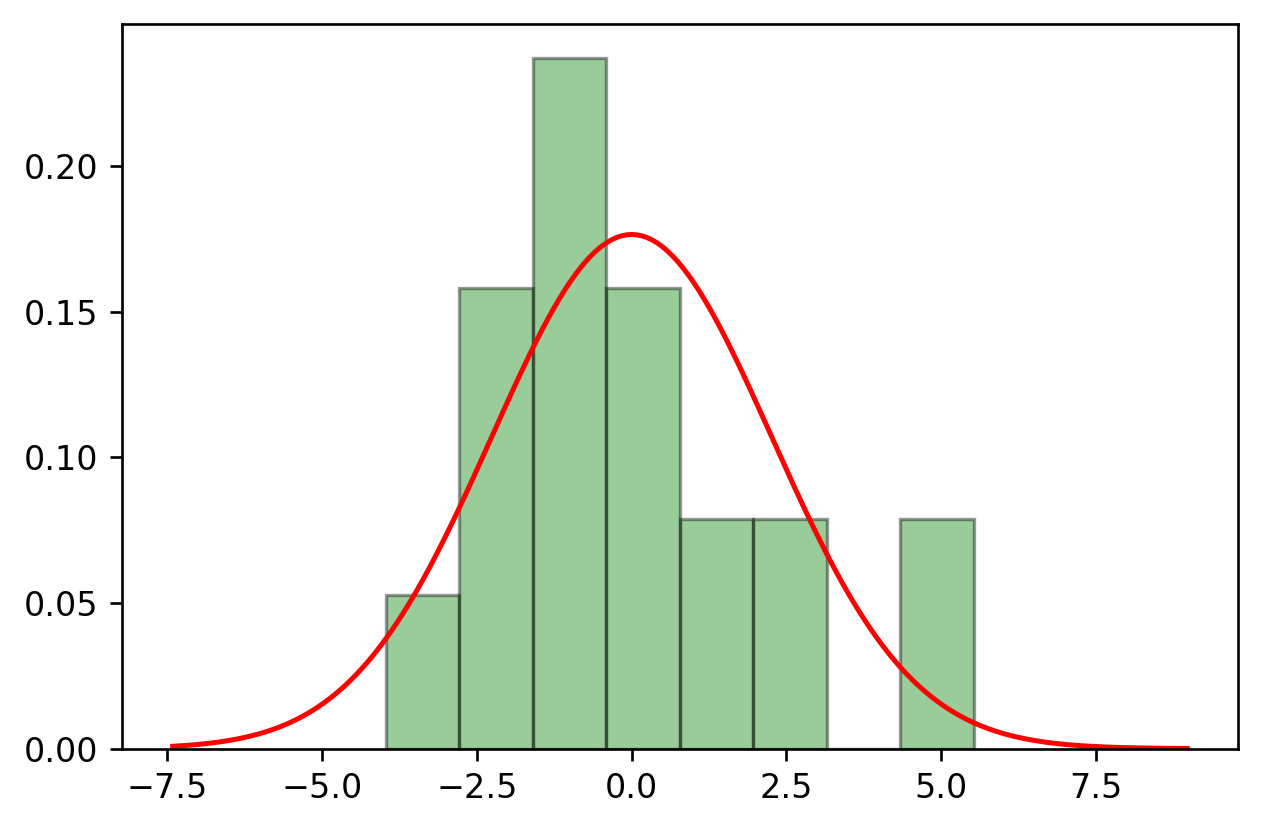

In [ ]:

sns.distplot(residuals,
                  bins=8,
                  kde=False,
                  color='deepskyblue',
                  hist_kws={"color":'green','ec':'black'},
                  fit=stats.norm,
                  fit_kws={"color":'red'})
plt.show()

In [ ]:
dist = getattr(stats, 'norm')
params = dist.fit(residuals)

In [ ]:
# here we apply the Kolmogorov-Smirnov test
stats.kstest(residuals, "norm", params) # the confidence has increased compared to the case of using only one input feature.

KstestResult(statistic=0.15722261669146254, pvalue=0.37091468826166857)

In [ ]:
17/1.5

11.333333333333334